# ExactSpace Data Science Internship Assessment

In [1]:
#Importing necessary libraries for further Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_excel("/content/data.xlsx") #Reading the given dataset

In [3]:
df.head() # Retrieving the first five rows of the DataFrame

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [ ]:
df.shape #Shape of the dataset

(377719, 7)

In [ ]:
df.loc[104680] #checking the random row values

time                        2017-12-30 11:20:00
Cyclone_Inlet_Gas_Temp                    878.5
Cyclone_Material_Temp                    949.96
Cyclone_Outlet_Gas_draft                -223.34
Cyclone_cone_draft                      -228.83
Cyclone_Gas_Outlet_Temp                  907.87
Cyclone_Inlet_Draft                     -171.08
Name: 104680, dtype: object

# Data Preprocessing

In [ ]:
df.dtypes #checking the datatypes of the each column

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp              object
Cyclone_Material_Temp               object
Cyclone_Outlet_Gas_draft            object
Cyclone_cone_draft                  object
Cyclone_Gas_Outlet_Temp             object
Cyclone_Inlet_Draft                 object
dtype: object

In [ ]:
type(df.iloc[0,1]), type(df.iloc[377718,4]) #Checking whether all the values(also numerical/float) are Object or Not

(float, float)

In [ ]:
unique= df[df['Cyclone_Inlet_Gas_Temp'].apply(lambda x: isinstance(x, str))] #Retreiving the rows of Cyclone_Inlet_Gas_Temp consisting the Object datatype

In [ ]:
unique

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
2471,2017-01-09 13:55:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2472,2017-01-09 14:00:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2473,2017-01-09 14:05:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2474,2017-01-09 14:10:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2475,2017-01-09 14:15:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
...,...,...,...,...,...,...,...
322814,2020-01-29 20:55:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
322815,2020-01-29 21:00:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
322816,2020-01-29 21:05:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
322817,2020-01-29 21:10:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout


In [ ]:
counts = unique['Cyclone_Inlet_Gas_Temp'].value_counts() #Count of the unique object datatypes in 'Cyclone_Inlet_Gas_Temp'
counts

Not Connect     723
I/O Timeout     470
Configure       108
Scan Timeout     17
Comm Fail         2
Name: Cyclone_Inlet_Gas_Temp, dtype: int64

In [ ]:
unique['Cyclone_Inlet_Gas_Temp'].unique()

array(['I/O Timeout', 'Not Connect', 'Scan Timeout', 'Configure',
       'Comm Fail'], dtype=object)

In [ ]:
unique['Cyclone_Outlet_Gas_draft'].unique()

array(['I/O Timeout', 'Not Connect', 'Scan Timeout', 'Configure',
       'Comm Fail'], dtype=object)

In [5]:
material_unique= df[df['Cyclone_Material_Temp'].apply(lambda x: isinstance(x, str))] #Retreiving the rows of Cyclone_Material_Temp consisting the Object datatype

In [6]:
material_unique

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
2471,2017-01-09 13:55:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2472,2017-01-09 14:00:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2473,2017-01-09 14:05:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2474,2017-01-09 14:10:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2475,2017-01-09 14:15:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
...,...,...,...,...,...,...,...
375585,2020-07-31 02:30:00,886.18,Unit Down,-239.29,-228.77,895.48,-189
375850,2020-08-01 00:35:00,877.45,Unit Down,-242.89,-238.96,875.96,-191.24
376010,2020-08-01 13:55:00,886.24,Unit Down,-242.26,-192.75,891.92,-187.82
376885,2020-08-04 14:50:00,886.11,Unit Down,-230.19,-201.24,883.23,-179.27


In [7]:
counts= material_unique['Cyclone_Material_Temp'].value_counts() #Count of the unique object datatypes in 'Cyclone_Material_Temp'
counts

Not Connect     723
I/O Timeout     470
Unit Down       271
Configure       108
Scan Timeout     17
Comm Fail         2
Name: Cyclone_Material_Temp, dtype: int64

In [ ]:
outlet_unique = df[df['Cyclone_Outlet_Gas_draft'].apply(lambda x: isinstance(x, str))]  #Retreiving the rows of 'Cyclone_Outlet_Gas_draft' consisting the Object datatype

In [ ]:
outlet_unique

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
2471,2017-01-09 13:55:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2472,2017-01-09 14:00:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2473,2017-01-09 14:05:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2474,2017-01-09 14:10:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2475,2017-01-09 14:15:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
...,...,...,...,...,...,...,...
322814,2020-01-29 20:55:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
322815,2020-01-29 21:00:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
322816,2020-01-29 21:05:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
322817,2020-01-29 21:10:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout


In [ ]:
outlet_unique['Cyclone_Outlet_Gas_draft'].value_counts() #Count of the unique object datatypes in 'Cyclone_Outlet_Gas_draft'

Not Connect     723
I/O Timeout     470
Configure       108
Scan Timeout     17
Comm Fail         2
Unit Down         1
Name: Cyclone_Outlet_Gas_draft, dtype: int64

In [ ]:
cone_unique= df[df['Cyclone_cone_draft'].apply(lambda x: isinstance(x, str))] #Retreiving the rows of 'Cyclone_cone_draft' consisting the Object datatype
cone_unique

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
2471,2017-01-09 13:55:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2472,2017-01-09 14:00:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2473,2017-01-09 14:05:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2474,2017-01-09 14:10:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2475,2017-01-09 14:15:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
...,...,...,...,...,...,...,...
322814,2020-01-29 20:55:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
322815,2020-01-29 21:00:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
322816,2020-01-29 21:05:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
322817,2020-01-29 21:10:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout


In [ ]:
cone_unique['Cyclone_cone_draft'].value_counts() #Count of the unique object datatypes in 'Cyclone_cone_draft'

Not Connect     723
I/O Timeout     470
Configure       108
Scan Timeout     17
Comm Fail         2
Name: Cyclone_cone_draft, dtype: int64

In [ ]:
gas_unique= df[df['Cyclone_Gas_Outlet_Temp'].apply(lambda x: isinstance(x, str))] #Retreiving the rows of 'Cyclone_Gas_Outlet_Temp' consisting the Object datatype
gas_unique

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
2471,2017-01-09 13:55:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2472,2017-01-09 14:00:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2473,2017-01-09 14:05:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2474,2017-01-09 14:10:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2475,2017-01-09 14:15:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
...,...,...,...,...,...,...,...
322814,2020-01-29 20:55:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
322815,2020-01-29 21:00:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
322816,2020-01-29 21:05:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
322817,2020-01-29 21:10:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout


In [ ]:
cone_unique['Cyclone_Gas_Outlet_Temp'].value_counts() #Count of the unique object datatypes in 'Cyclone_cone_draft'

Not Connect     723
I/O Timeout     470
Configure       108
Scan Timeout     17
Comm Fail         2
Name: Cyclone_Gas_Outlet_Temp, dtype: int64

In [ ]:
inlet_unique= df[df['Cyclone_Inlet_Draft'].apply(lambda x: isinstance(x, str))]  #Retreiving the rows of 'Cyclone_Inlet_Draft' consisting the Object datatype
inlet_unique

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
2471,2017-01-09 13:55:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2472,2017-01-09 14:00:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2473,2017-01-09 14:05:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2474,2017-01-09 14:10:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2475,2017-01-09 14:15:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
...,...,...,...,...,...,...,...
322814,2020-01-29 20:55:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
322815,2020-01-29 21:00:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
322816,2020-01-29 21:05:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
322817,2020-01-29 21:10:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout


In [ ]:
inlet_unique['Cyclone_Inlet_Draft'].value_counts() #Count of the unique object datatypes in 'Cyclone_Inlet_Draft'

Not Connect     723
I/O Timeout     470
Configure       108
Scan Timeout     17
Unit Down         2
Comm Fail         2
Name: Cyclone_Inlet_Draft, dtype: int64

* More than 700 "Not Connect" values, 470 "I/O Timeout" values and 100+ "Configure" values were there in the dataset.
* We have to handle them by replacing by an appropriate values.
* Deleting the rows that consists of "Comm Fail" as it can't impact much in the dataset.

In [ ]:
df.shape #Checking the shape of the dataframe before data preprocessing

(377719, 7)

In [ ]:
#Deleting the rows that consists of "Comm Fail"
df1 = df[~df.isin(['Comm Fail']).any(axis=1)]

df1.reset_index(drop=True, inplace=True) # Reset the index if needed

In [ ]:
df1.shape #shape after deleting the two rows

(377717, 7)

Deleted two rows which are not much impactable in dataset.

In [ ]:
df1.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [ ]:
# Create a copy of the original dataframe
df_copy = df.copy()

# Convert non-numeric values to NaN in the non-datetime columns of the copy
numeric_cols = df_copy.select_dtypes(exclude='datetime').columns
df_copy[numeric_cols] = df_copy[numeric_cols].apply(pd.to_numeric, errors='coerce')
df_copy.reset_index(drop=True, inplace=True)

In [ ]:
df_copy.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [ ]:
df_copy.loc[2471] #Checking the row values for a random number '2471'

time                        2017-01-09 13:55:00
Cyclone_Inlet_Gas_Temp                      NaN
Cyclone_Material_Temp                       NaN
Cyclone_Outlet_Gas_draft                    NaN
Cyclone_cone_draft                          NaN
Cyclone_Gas_Outlet_Temp                     NaN
Cyclone_Inlet_Draft                         NaN
Name: 2471, dtype: object

**Observation-1**: All the parameters are NaN values except "Time".

In [ ]:
df_copy.loc[375585] #Checking the row values for a random number '375585'

time                        2020-07-31 02:30:00
Cyclone_Inlet_Gas_Temp                   886.18
Cyclone_Material_Temp                       NaN
Cyclone_Outlet_Gas_draft                -239.29
Cyclone_cone_draft                      -228.77
Cyclone_Gas_Outlet_Temp                  895.48
Cyclone_Inlet_Draft                      -189.0
Name: 375585, dtype: object

**Observation-2**: All the parameters having a value, except 'Cyclone_Material_Temp'

## Data Visualization for Preprocessing

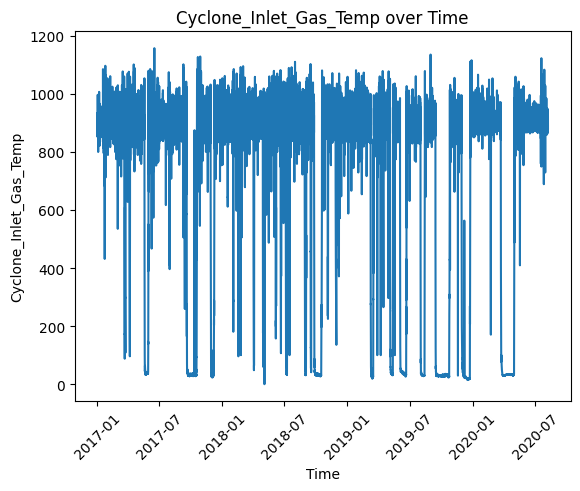

In [ ]:
mask = pd.to_numeric(df['Cyclone_Inlet_Gas_Temp'], errors='coerce').notnull() #Plotting the graph for 'Cyclone_Inlet_Gas_Temp' feature against 'time'
filtered_df = df.loc[mask]

# Plot the graph
plt.plot(filtered_df['time'], pd.to_numeric(filtered_df['Cyclone_Inlet_Gas_Temp']))
plt.xlabel('Time')
plt.ylabel('Cyclone_Inlet_Gas_Temp')
plt.title('Cyclone_Inlet_Gas_Temp over Time')
plt.xticks(rotation=45)
plt.show()

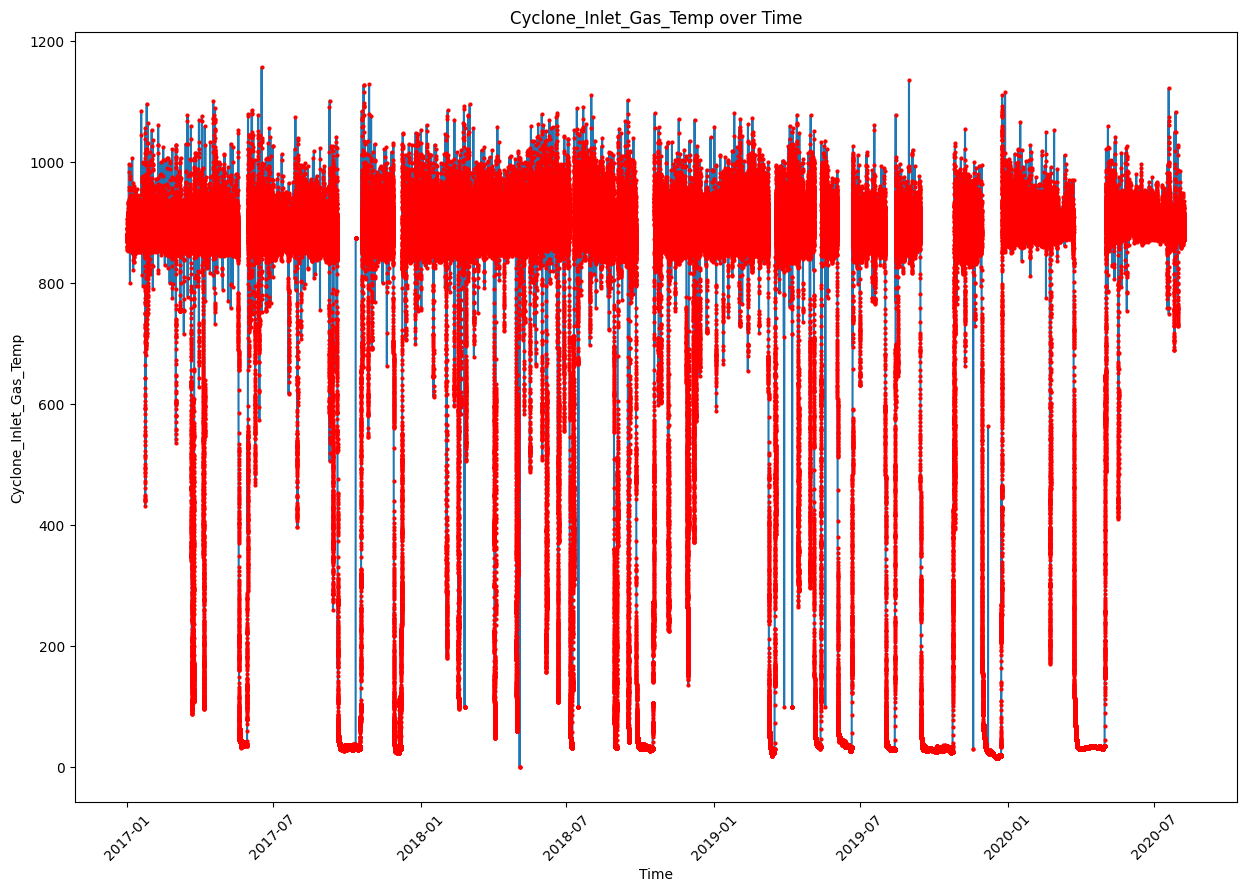

In [ ]:
df['Cyclone_Inlet_Gas_Temp'] = pd.to_numeric(df['Cyclone_Inlet_Gas_Temp'], errors='coerce') #Plotting the graph for 'Cyclone_Inlet_Gas_Temp' feature against 'time'

plt.figure(figsize=(15, 10))

# Plot the graph with NaN values as gaps
plt.plot(df['time'], df['Cyclone_Inlet_Gas_Temp'])
plt.xlabel('Time')
plt.ylabel('Cyclone_Inlet_Gas_Temp')
plt.title('Cyclone_Inlet_Gas_Temp over Time')
plt.xticks(rotation=45)

# Remove the NaN values from the plot
plt.plot(df['time'], df['Cyclone_Inlet_Gas_Temp'], 'o', markersize=2, color='red')

plt.show()

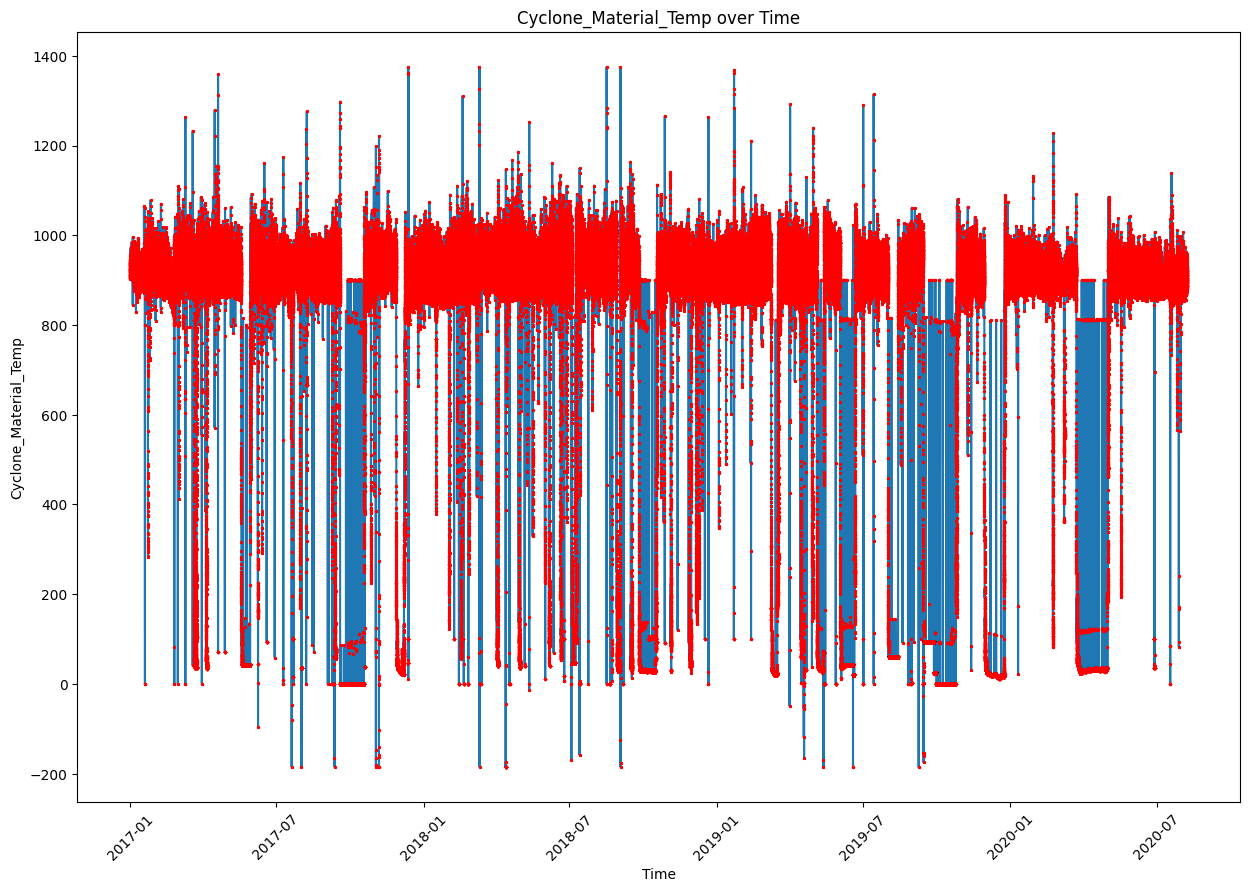

In [ ]:
df['Cyclone_Material_Temp'] = pd.to_numeric(df['Cyclone_Material_Temp'], errors='coerce') #Plotting the graph for 'Cyclone_Material_Temp' feature against 'time'

plt.figure(figsize=(15, 10))

# Plot the graph with NaN values as gaps
plt.plot(df['time'], df['Cyclone_Material_Temp'])
plt.xlabel('Time')
plt.ylabel('Cyclone_Material_Temp')
plt.title('Cyclone_Material_Temp over Time')
plt.xticks(rotation=45)

# Remove the NaN values from the plot
plt.plot(df['time'], df['Cyclone_Material_Temp'], '*', markersize=2, color='red')

plt.show()

# Applying "Interpolation" method for replacing the anomalies

In [ ]:
columns_to_interpolate = ['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp', 'Cyclone_Outlet_Gas_draft',
                          'Cyclone_cone_draft', 'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft']
df_interpolated = df_copy.copy() #Copying the 'df_copy' into 'df_interpolated'

# Apply interpolation to the desired columns
df_interpolated[columns_to_interpolate] = df_interpolated[columns_to_interpolate].interpolate(method='linear')

# Verifing the dataset after interpolation
df_interpolated.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [ ]:
df_interpolated.loc[2471] #Checking the row '2471' whether all the features were replaced or not

time                        2017-01-09 13:55:00
Cyclone_Inlet_Gas_Temp               919.701818
Cyclone_Material_Temp                933.643182
Cyclone_Outlet_Gas_draft            -197.345455
Cyclone_cone_draft                  -186.840909
Cyclone_Gas_Outlet_Temp              887.541364
Cyclone_Inlet_Draft                 -152.204545
Name: 2471, dtype: object

**Observation-3**: As in Observation-1 all the features which were NaN were replaced with Interpolated values.

In [ ]:
df_interpolated.loc[375585] #Checking the row '375585' whether all the features were replaced or not

time                        2020-07-31 02:30:00
Cyclone_Inlet_Gas_Temp                   886.18
Cyclone_Material_Temp                   894.115
Cyclone_Outlet_Gas_draft                -239.29
Cyclone_cone_draft                      -228.77
Cyclone_Gas_Outlet_Temp                  895.48
Cyclone_Inlet_Draft                      -189.0
Name: 375585, dtype: object

**Observation-4**: As in Observation-2 Cyclone_Material_Temp was NaN is replaced with Interpolated value.

In [ ]:
df_interpolated.loc[322817]

time                        2020-01-29 21:10:00
Cyclone_Inlet_Gas_Temp                   878.62
Cyclone_Material_Temp                  896.0025
Cyclone_Outlet_Gas_draft            -276.995833
Cyclone_cone_draft                  -229.004167
Cyclone_Gas_Outlet_Temp              875.971667
Cyclone_Inlet_Draft                    -226.125
Name: 322817, dtype: object

In [ ]:
df_interpolated.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [ ]:
df_interpolated.shape #Checking the shape of the dataset after Interpolation Method

(377719, 7)

In [ ]:
df_interpolated.to_csv('preprocessed_data.csv', index=True) #Exporting the Preprocessed data for further Analysis

In [ ]:
#Importing Libraries for further Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
data= pd.read_csv("preprocessed_data.csv")
data = data.drop(data.columns[0], axis=1)

In [ ]:
data.head() #Retreiving the first four rows after preprocessing the data

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [ ]:
data['time'] = pd.to_datetime(data['time']) #Checking whether any anomalies(string or object) are present or not
data.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp             float64
Cyclone_Material_Temp              float64
Cyclone_Outlet_Gas_draft           float64
Cyclone_cone_draft                 float64
Cyclone_Gas_Outlet_Temp            float64
Cyclone_Inlet_Draft                float64
dtype: object

**Observation-5**: No datatype is present other than Numerical and Datetime for further analysis.

# Feature Engineering

In [ ]:
data1= data.copy() #Copying the 'data' dataframe to 'data1'
data1.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


## Adding day, month and year to obtain further insights

In [ ]:
data1['day']= data1['time'].dt.day
data1['month']= data1['time'].dt.month
data1['year']= data1['time'].dt.year

In [ ]:
data1.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,day,month,year
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,1,1,2017
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,1,1,2017
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,1,1,2017
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,1,1,2017
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,1,1,2017


## Adding 'season' feature

In [ ]:
data1['time'] = pd.to_datetime(data1['time'])

# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]: #Months like December, January and February are the Winter Season
        return 'Winter'
    elif month in [6, 7, 8]: #Months like June, July and August are the Monsoon Season
        return 'Rainy'
    else:
        return 'Summer'      #Rest of the months I am considering as Summer

# Apply the function to create the 'season' column
data1['season'] = data1['time'].dt.month.apply(get_season)

In [ ]:
data1.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,day,month,year,season
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,1,1,2017,Winter
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,1,1,2017,Winter
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,1,1,2017,Winter
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,1,1,2017,Winter
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,1,1,2017,Winter


## Adding 'Week' number for observation on weekly basis

In [ ]:
data1['weekday'] = data1['time'].dt.day_name()

In [ ]:
data1.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,day,month,year,season,weekday
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,1,1,2017,Winter,Sunday
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,1,1,2017,Winter,Sunday
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,1,1,2017,Winter,Sunday
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,1,1,2017,Winter,Sunday
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,1,1,2017,Winter,Sunday


In [ ]:
data1.columns

Index(['time', 'Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft', 'day', 'month',
       'year', 'season', 'weekday'],
      dtype='object')

## Cyclic Features

In [ ]:
data1['hour_of_day'] = data1['time'].dt.hour
data1['day_of_year'] = data1['time'].dt.dayofyear

In [ ]:
data1.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,day,month,year,season,weekday,hour_of_day,day_of_year
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,1,1,2017,Winter,Sunday,0,1
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,1,1,2017,Winter,Sunday,0,1
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,1,1,2017,Winter,Sunday,0,1
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,1,1,2017,Winter,Sunday,0,1
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,1,1,2017,Winter,Sunday,0,1


In [ ]:
data1['date'] = data1['time'].dt.date

In [ ]:
data1.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,day,month,year,season,weekday,hour_of_day,day_of_year,date
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,1,1,2017,Winter,Sunday,0,1,2017-01-01
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,1,1,2017,Winter,Sunday,0,1,2017-01-01
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,1,1,2017,Winter,Sunday,0,1,2017-01-01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,1,1,2017,Winter,Sunday,0,1,2017-01-01
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,1,1,2017,Winter,Sunday,0,1,2017-01-01


In [ ]:
data1['Time'] = data1['time'].dt.strftime('%H:%M')

In [ ]:
data1.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,day,month,year,season,weekday,hour_of_day,day_of_year,date,Time
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,1,1,2017,Winter,Sunday,0,1,2017-01-01,00:00
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,1,1,2017,Winter,Sunday,0,1,2017-01-01,00:05
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,1,1,2017,Winter,Sunday,0,1,2017-01-01,00:10
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,1,1,2017,Winter,Sunday,0,1,2017-01-01,00:15
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,1,1,2017,Winter,Sunday,0,1,2017-01-01,00:20


In [ ]:
data1.columns

Index(['time', 'Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft', 'day', 'month',
       'year', 'season', 'weekday', 'hour_of_day', 'day_of_year', 'date',
       'Time'],
      dtype='object')

## Adding "time_category" column consists (morning, afternoon, evening and night)

In [ ]:
def get_time_category(time):
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Convert 'time' column to datetime type
data['time'] = pd.to_datetime(data['time'])

# Apply the function to create the 'time_category' column
data['time_category'] = data['time'].apply(get_time_category)

In [ ]:
data.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,day,month,year,season,weekday,hour_of_day,day_of_year,date,Time,time_category
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,1,1,2017,Winter,Sunday,0,1,2017-01-01,00:00,Night
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,1,1,2017,Winter,Sunday,0,1,2017-01-01,00:05,Night
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,1,1,2017,Winter,Sunday,0,1,2017-01-01,00:10,Night
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,1,1,2017,Winter,Sunday,0,1,2017-01-01,00:15,Night
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,1,1,2017,Winter,Sunday,0,1,2017-01-01,00:20,Night


#Data Visualization

## Outlier Detection

In [ ]:
data.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,day,month,year,season,weekday,hour_of_day,day_of_year,date,Time,time_category
0,2023-06-18 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,1,1,2017,Winter,Sunday,0,1,2017-01-01,2023-06-18 00:00:00,Night
1,2023-06-18 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,1,1,2017,Winter,Sunday,0,1,2017-01-01,2023-06-18 00:05:00,Night
2,2023-06-18 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,1,1,2017,Winter,Sunday,0,1,2017-01-01,2023-06-18 00:10:00,Night
3,2023-06-18 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,1,1,2017,Winter,Sunday,0,1,2017-01-01,2023-06-18 00:15:00,Night
4,2023-06-18 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,1,1,2017,Winter,Sunday,0,1,2017-01-01,2023-06-18 00:20:00,Night


In [ ]:
data.columns

Index(['time', 'Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft', 'day', 'month',
       'year', 'season', 'weekday', 'hour_of_day', 'day_of_year', 'date',
       'Time', 'time_category'],
      dtype='object')

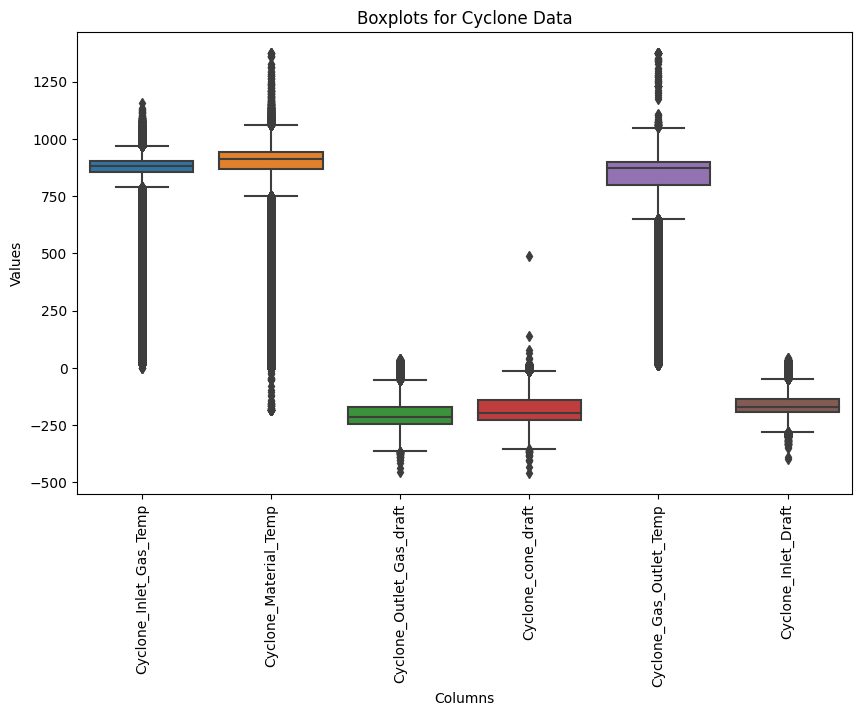

In [ ]:
import seaborn as sns
subset_data = data[['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
                   'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
                   'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft']]

# Reshape the DataFrame for plotting
melted_data = pd.melt(subset_data)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create boxplots using seaborn
sns.boxplot(x='variable', y='value', data=melted_data)

# Set labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplots for Cyclone Data')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
subset_data.describe().round(2)

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,377719.00,377719.00,377719.00,377719.00,377719.00,377719.00
mean,726.03,749.40,-177.45,-164.25,714.46,-141.02
std,329.75,352.07,99.38,90.31,326.39,77.79
min,0.00,-185.00,-456.66,-459.31,13.79,-396.37
25%,855.88,867.07,-247.15,-226.73,799.10,-193.45
50%,882.32,913.23,-215.08,-198.43,871.38,-169.35
75%,901.08,943.58,-169.25,-142.37,899.23,-135.52
max,1157.63,1375.00,40.27,488.86,1375.00,41.64


In [ ]:
for column in subset_data.columns:
    # Calculate the lower and upper whiskers
    whiskers = data[column].describe()[['25%', '75%']].values
    iqr = whiskers[1] - whiskers[0]
    lower_whisker = whiskers[0] - 1.5 * iqr
    upper_whisker = whiskers[1] + 1.5 * iqr

    # Count the values outside minima and maxima
    count_below_minima = (data[column] < lower_whisker).sum()
    count_above_maxima = (data[column] > upper_whisker).sum()

    print("Column:", column)
    print("Values below minima:", count_below_minima)
    print("Values above maxima:", count_above_maxima)
    print()

Column: Cyclone_Inlet_Gas_Temp
Values below minima: 81914
Values above maxima: 3919

Column: Cyclone_Material_Temp
Values below minima: 79169
Values above maxima: 639

Column: Cyclone_Outlet_Gas_draft
Values below minima: 30
Values above maxima: 81993

Column: Cyclone_cone_draft
Values below minima: 20
Values above maxima: 75235

Column: Cyclone_Gas_Outlet_Temp
Values below minima: 80644
Values above maxima: 118

Column: Cyclone_Inlet_Draft
Values below minima: 127
Values above maxima: 82364



#Obtaining Insights

### Power BI was utilized to visualize the most crucial insights, as it proved to be a versatile and efficient tool compared to Python. Its capabilities enabled us to obtain a comprehensive and detailed understanding of the data, revealing numerous valuable insights. The visualizations created in Power BI facilitated a more thorough analysis and interpretation of the data, leading to a deeper exploration of the underlying patterns and trends.
### I have shared with you the PowerBI file, specifically named 'ExactSpace_Assessment,' in which I have extensively worked on the Data Visualization and Insights part.